In [13]:
# 와인 분류 모델
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
red_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep =';')
white_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
red_wine["type"] = "red"
white_wine["type"] = "white" # 와인별 식별자 추가
wine = red_wine.append(white_wine) # 두 종류의 와인을 합침
wine.columns = wine.columns.str.replace(" ", "_") # 파라미터의 구분을 용이하게 하기 위해 공백을 언더바로 대체
wine.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


 참고 문헌 : "https://www.youtube.com/watch?v=CBvSFgfDyow" 
 K-ICT 빅데이터 센터 유튜브

선형회귀 모델

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True) # 상수항 이용

In [3]:
X = wine.drop(["type", "quality"], axis = 1) 
y = wine.quality 
# 사이킷런을 이용하기 위해 특징행렬과 대상벡터 추출

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=42)
# 훈련세트와 테스트 세트 분리
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state = 42, test_size = 0.2)
# 이후 훈련 세트에서 검증 세트 분리
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5197, 11) (1300, 11) (5197,) (1300,)
(4157, 11) (1040, 11) (4157,) (1040,)


In [5]:
lr.fit(X_train, y_train)
lr.coef_ # 기울기
lr.intercept_ # 절편

49.05449494066056

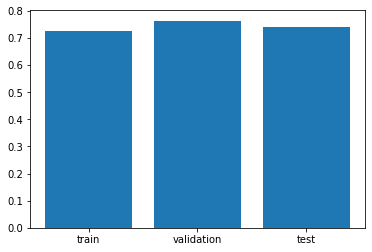

In [19]:
from sklearn.metrics import mean_squared_error # 결정계수 라이브러리
linear_train = np.round(np.sqrt(mean_squared_error(y_train, lr.predict(X_train))),3)
linear_val = np.round(np.sqrt(mean_squared_error(y_validation, lr.predict(X_validation))),3) # 관측값과 예측값을 줌
linear_test = np.round(np.sqrt(mean_squared_error(y_test, lr.predict(X_test))),3)


list_x = ['train','validation','test']
list_y = [linear_train, linear_val, linear_test]

plt.bar(list_x, list_y)
plt.show() # 선형회귀 결과 출력

K- 최근접 이웃 회귀

0.12528900247834907
0.43645439972981825
0.17032882084334655
0.31671985383434487


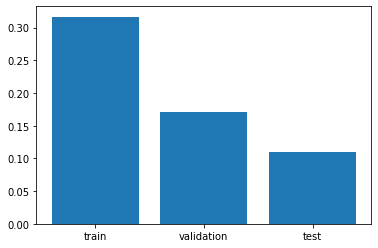

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train, y_train)
print(knr.score(X_validation, y_validation)) # 검증 모델에 대하여 평가 후 출력
k_test_prediction = knr.predict(X_validation) 
print(knr.score(X_train, y_train)) # 훈련 모델 평가 후 출력

knr.n_neighbors = 10 # 둘 다의 점수가 낮으나 훈련 세트의 점수가 지나치게 높음 과대적합을 제어해야 함
knr.fit(X_train, y_train) # 새로 훈련

k_train = knr.score(X_train, y_train)
k_val = knr.score(X_validation, y_validation)
k_test = knr.score(X_test, y_test)


list_x = ['train','validation','test']
list_y = [k_train, k_val, k_test]

plt.bar(list_x, list_y)
plt.show() # k 최근접 결과 그래프 출력


그리드서치로 최적의 하이퍼 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

# 좀 더 그리드서치에 대해서 공부해보고 다시 해 볼것

릿지 회귀

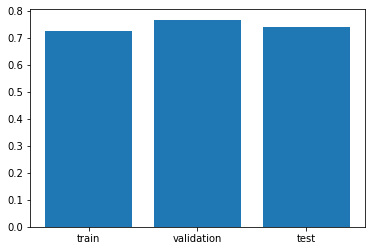

In [60]:
from sklearn.linear_model import Ridge

alpha = 0.05
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) # 릿지모델 훈련

ridge_train = np.round(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train))),3)
ridge_val = np.round(np.sqrt(mean_squared_error(y_validation, ridge.predict(X_validation))),3)
ridge_test = np.round(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))),3)
 # 성능 측정을 위한 rmse값

list_x = ['train','validation','test']
list_y = [ridge_train, ridge_val, ridge_test]

plt.bar(list_x, list_y)
plt.show() #  릿지 회귀 결과 그래프 출력


라쏘 모델

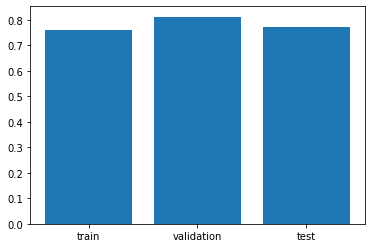

In [66]:
from sklearn.linear_model import Lasso

alpha = 0.05
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train) # 라쏘 모델 훈련

lasso_train = np.round(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))), 3)
lasso_validation = np.round(np.sqrt(mean_squared_error(y_validation, lasso.predict(X_validation))), 3)
lasso_test = np.round(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))), 3)
# 성능 측정을 위한 rmse 구하기

list_x = ['train','validation','test']
list_y = [lasso_train, lasso_validation, lasso_test]

plt.bar(list_x, list_y)
plt.show() #  라쏘 회귀 결과 그래프 출력